# Pytorch workflow
This section looks at a typical pytorch workflow. We will create the data, perpare it, create our model, train it, and test it.

here are some important things we are going to be using
1. torch.nn => contains all of the buildings for computetional graphs (a neural network can be a computetional graph)
2. torch.nn.Parameter => what paramater should our model try and learn
3. torch.nn.Module => Base class for all neural network modules, when extending it you should overwrite forward

In [ ]:
import torch
from torch import nn # nn contains all of pytorch's building blocks for neural networks
import matplotlib.pyplot as plt

## Data (preparing and loading)
Data can be almost anything in machine learning.

In machine learning you:
1. Get data into a numerical representation.
2. Build a model to elarn patterns in that numerical representation.

We will create asom e data using the linear regression formula to show this.

***Linear Regression => y = mx + c***

In [ ]:
# Creating known parameters
weight = 0.7 # in this case the gradient
bias = 0.3 # in this case the y intercept/c

# Create some data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) # tensors and matrices are usually named with capitals, this is not one yet, but it will be later
y = weight * X + bias

X, y

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800],
         [0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.3000],
         [0.3140],
         [

## Splitting data into training and test sets
This is one of the most important concepts in machine learning in general.
From the total data that you have, you always need to leave some, so be able to check/test that you model is working as expected.
The training set should be 60-80% of the total data, and the testing set will be whatever is left.

In some cases there is also a validation set, where you can tune your model, but that is not always used, and we will not be using this pattern.
Validation set would be 10%-20% of your total data.

In [ ]:
# We will split our data into 80% training and 20% testing
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
  plt.figure(figsize=(5, 5))
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 10})

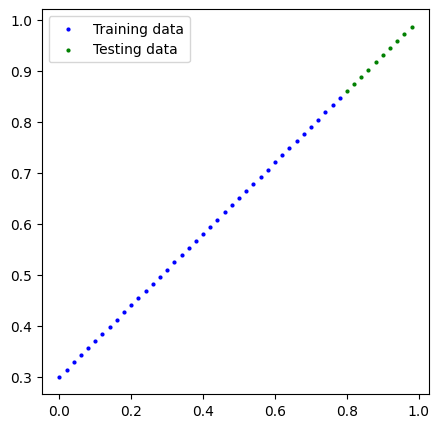

In [ ]:
plot_predictions()

## Building the pytorch model


In [ ]:
class LinearRegressionModel(nn.Module): # almost everything in pytorch inherits from this
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.rand(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.rand(1, requires_grad=True, dtype=torch.float))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weight * x + self.bias # This is the linear regression formulat y = mx + c


torch.manual_seed(42)
model_0 = LinearRegressionModel()
model_0.state_dict()

OrderedDict([('weight', tensor([0.8823])), ('bias', tensor([0.9150]))])

## Making predictions
You might have notices torch.inference_mode, what that does is it turns off the gradient for all of our parameters, we do this because in our case it's useless and it slows things down when using them. We do not need to make those calculations. There is also torch.no_grad but inference mode is faster.


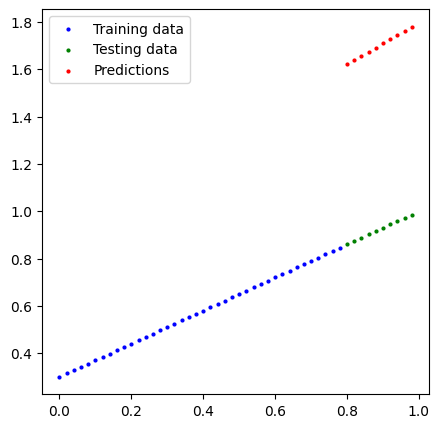

In [ ]:
with torch.inference_mode():
  y_preds = model_0(X_test)

plot_predictions(predictions=y_preds)

## Training the model
One way to see how bad your model is, is by using the **loss function**, which is also called cost function or criterion.

To improve our model we use an **optimizer**, which takes into account the loss of a model and adjusts the parameters. In other words the algorithm that we are going to use.

We will be using the following algorithms to train our model in this example:
1. Gradient descnet
2. Backpropagation

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.005)# lr = learning rate = arguably the most important hyper parameter (a parameter set manually by us)


### Training loop
Here is how a training loop is usually structured:
1. Loop through the data
2. Forward pass to make predictions on data - also called forward propagation
3. Calculate the loss (compare forward pass predictions to ground turth table)
4. Optimizer zero grad - the optimizer calculates gradients, and these gradients can accumulate if you don't reset it.
5. Loss backward - move backwards through the network to calculate gradients of each parameters of our model with respects to the loss. (**This is back propagation**)
6. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss. (**This is gradient descent**)

epoch: 0, loss: 0.6860889196395874, test loss: 0.7704880833625793 
epoch: 10, loss: 0.6284838914871216, test loss: 0.7031329274177551 
epoch: 20, loss: 0.5708788633346558, test loss: 0.6357777118682861 
epoch: 30, loss: 0.5132738351821899, test loss: 0.5684224963188171 
epoch: 40, loss: 0.45566874742507935, test loss: 0.5010673403739929 
epoch: 50, loss: 0.39806365966796875, test loss: 0.4337121546268463 
epoch: 60, loss: 0.34045863151550293, test loss: 0.3663569688796997 
epoch: 70, loss: 0.2828536033630371, test loss: 0.2990017831325531 
epoch: 80, loss: 0.2252485454082489, test loss: 0.23164665699005127 
epoch: 90, loss: 0.1676435023546219, test loss: 0.16429145634174347 
epoch: 100, loss: 0.11003844439983368, test loss: 0.09693627804517746 
epoch: 110, loss: 0.05243339389562607, test loss: 0.029581105336546898 
epoch: 120, loss: 0.009869909845292568, test loss: 0.019443172961473465 
epoch: 130, loss: 0.007865558378398418, test loss: 0.018076878041028976 
epoch: 140, loss: 0.0061482

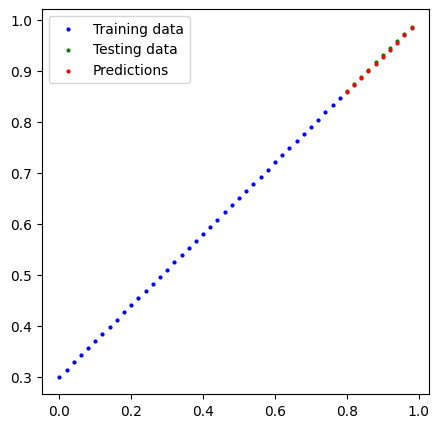

In [ ]:
# an epoch is one loop through the data... (This is a hyperparameter because we set it ourselves)
epochs = 200

loss_values = []
test_loss_values = []
# 1. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode sets all parameters that require gradients to require gradients
  # 2. Forward pass
  y_pred = model_0(X_train)
  # 3. Cal loss
  loss = loss_fn(y_pred, y_train);

  # 4. Optimizer zero grad
  optimizer.zero_grad()
  # 5. Backpropagation
  loss.backward()
  # 6. Optimizer
  optimizer.step()

  model_0.eval()# this turns off gradient tracking.
  # Testing
  with torch.inference_mode():
    test_preds = model_0(X_test)
    test_loss = loss_fn (test_preds, y_test)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
  if epoch % 10 == 0:
    print(f"epoch: {epoch}, loss: {loss}, test loss: {test_loss} ")


with torch.inference_mode():
  test_preds = model_0(X_test)
  test_loss = loss_fn (test_preds, y_test)
if epoch % 10 == 0:
  print(f"epoch: {epoch}, loss: {loss}, test loss: {test_loss} ")

plot_predictions(predictions=test_preds)

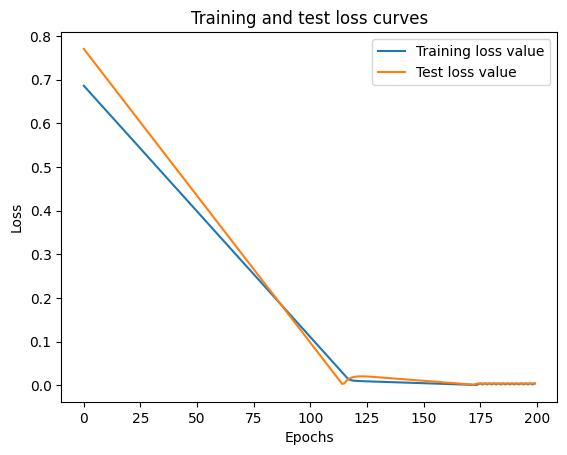

In [ ]:
# plotting loss curve
import numpy as np
loss_values = np.array(torch.tensor(loss_values).numpy()) # we dont need to do this with test_loss_values because we calculated the loss using inference mode
plt.plot(range(epochs), loss_values, label="Training loss value")
plt.plot(range(epochs), test_loss_values, label="Test loss value")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

# Saving a modle in pytorch
Here are functions you need to know:
1. `torch.save()` - it saves a pytorch object in python's pickle format
2. `torch.load()` - load saved pytorch object
3. `toich.nn.Module.load_state_dict()` - load a model's saved state dictionary into your model's object


In [ ]:
from pathlib import Path
MODELS_FOLDER = Path("models")
MODELS_FOLDER.mkdir(parents=True, exist_ok=True)

MODEL_FILE_NAME = "LinerRegressionModel.pth"
MODEL_FULL_PATH = MODELS_FOLDER / MODEL_FILE_NAME
# Saving
torch.save(obj=model_0.state_dict(), f=MODEL_FULL_PATH)
!ls -l models

#Loading
loaded_model_0 = LinearRegressionModel()
print(f"BEFORE loaded_model_0 {loaded_model_0.state_dict()}, model_0 {model_0.state_dict()}")
loaded_model_0.load_state_dict(torch.load(f=MODEL_FULL_PATH))
print(f"AFTER loaded_model_0 {loaded_model_0.state_dict()}, model_0 {model_0.state_dict()}")

total 4
-rw-r--r-- 1 root root 1115 Aug 25 14:00 LinerRegressionModel.pth
BEFORE loaded_model_0 OrderedDict([('weight', tensor([0.2566])), ('bias', tensor([0.7936]))]), model_0 OrderedDict([('weight', tensor([0.6978])), ('bias', tensor([0.2993]))])
AFTER loaded_model_0 OrderedDict([('weight', tensor([0.6978])), ('bias', tensor([0.2993]))]), model_0 OrderedDict([('weight', tensor([0.6978])), ('bias', tensor([0.2993]))])
